To process the audio signal, we need to somehow represent it on our machine. Several different options are possible, but the most common and useful one for sound processing is the discrete sample representation. That’s where the concepts of sampling and quantization come into play.

# 📎 How to represent a continuous function through discrete values?

The computers and hardware we are using are only capable of storing finite-valued numbers, e.g. 2, -5, 9.5, 10e3, some with less accuracy than others due to binary representation. How to represent a continuous (analog) function through such numbers?

If we know that the observed function of time
t
t is affine we can write:

$$
s(t) = a t + b
$$

and store the a and b coefficients, which are discrete numbers. Whenever someone asks for the
s
s value at a particular time
t
t we can easily calculate the output using the formula above.

If the signal is a sinusoid, it is completely determined by its amplitude $A$, frequency $f$ and phase offset $ϕ$:


$$s(t)=Asin(2πft+ϕ)$$

In general, we do not know how does the signal we are observing look like: that’s the whole point of observing it, right? That’s where sampling comes in.

![Phương trình s(t)](public/image_1.png)

An example of the observed signal: a 1 Hz sine (one period).

![](./public/image_2.png)

1 Hz sine sampled with sample rate equal to 8 Hz. Red dots mark the samples taken. Clearly the original signal can be reconstructed.

**Sampling** is the process of measuring and storing values of the observed continuous function $s(t)$ at discrete time intervals $nT$. From mathematical point of view, we can present it as:

$$s_{discrete}(n) = s_{continuous}(t)p(t) = s_{continuous}(t)\delta(t - nT) $$

where

$$
p(t) = \sum_{n=-\infty}^{+\infty}\delta(t - nT)
$$

is called an a $sampling function$ or an $impulse-train$ (a series of discrete Dirac impulses spaced at time intervals
$T$). In the equations above, $t$ is the continuous time, whereas $n$ is the index of the sample taken. Discrete Dirac’s delta $\delta(x)$ is equal to
$1$ if $x$ is equal to $0$ and $0$ everywhere else:

$$
\delta(x) =
\begin{cases}
1 & \text{if } x = 0 \\
0 & \text{if } x \ne 0
\end{cases}
$$

so the right hand side expression in {eq:sampling} is equal to $0$ unless $t=nT$. $T$ is called the sampling period and is equal to the reciprocal of the $sampling frequency$:

$$ f_{s} = \frac{1}{T} $$

**Sampling frequency** (or **sampling rate**) is the number of samples of the continuous function (signal) we observe during one second. It is expressed in Hz ($\frac{1}{s}$)

Sampling rate is one of the most fundamentals parameters of any digital system we work with. It determines the behavior of many algorithms and the way we process sound. Most importantly, it specifies how we store and reproduce the sound.

A theorem of utmost importance is the $sampling theorem$.

# 📎 The sampling theorem

If $f_{max}$ is the maximum frequency in the observed signal $s(t)$, it can be uniquely represented by a discrete sequence $s(nT)$ if

$$ f_{max} < \frac{f_{s}}{2} $$

where $t \in \mathbb{R} , n \in \mathbb{Z} \ and \ T = \frac{1}{f_{s}}$

What sampling theorem says, is that you need to take at least 3 samples per function’s period in order to be able to restore it to the continuous form. How the restoration will not be explained here.

This theorem goes by many names, among which different combinations of names Nyquist, Shannon and Kotelnikov are used. Its significance can be seen in its multiple corollaries and many applications, also in sound programming.

The quantity of $\frac{f_{s}}{2}$ is referred to as $Nyquist frequency$. In general, the signal we wish to observe, should not contain frequencies above the Nyquist frequency. Otherwise our sampling is prone to $aliasing$ which will be explained in another article. Suffice it to say, that it disturbes our view of the signal.

# 📎 Quantization

Not only we are not able to store continuous functions directly on digital machines, but we also fail to represent all its values precisely. **Quantization** describes, which values can we store adequately.

**Quantization in time** directly follows from the sampling methodology. We are only able to sample as fast as our $analog-to-digital converters$ (ADCs) let us. From a practical perspective, it is quite desirable to have evenly spaced samples, rather than intervals of varying length between successive samples. It lets us analyze the signal more easily and apply various mathematical operations (e.g. we are able to formulate it with the use of the impulse-train function $p(t))$.

**Quantization in amplitude** restricts the precision of our observation in the value of the samples we take. It starts in ADCs and can be changed throughout the digital system. Whenever we change quantization to a less fine-grained system, we lose information.

On a machine samples’ values can be stored as $integers$ (integer numbers of range specified by the number of bits used to represent them) or $floating-point numbers$ (capable of capturing very small as well as very large quantities). The former can be met in programming under the names of $short, int, long$ and the latter as $float$ or $double$. It is not within the scope of this article to explain the above-mentioned formats, but all of them are well-documented throughout the web.

# 📎 Sampling code example

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams.update({'font.size': 18})
xlim = [-0.01, 1.01]
yticks = [-1.0, 0.0, 1.0]

In [3]:
def signal(A, f, t):
    """
    :param A: amplitude
    :param f: frequency in Hz
    :param t: time in s
    :return: sine with amplitude A at frequency f over time t
    """
    return A * np.sin(2 * np.pi * f * t)

In [4]:
A = 1
f = 1
fs = 48000 # basic sampling rate in Hz, to make observed signal seem "continuous"

In [5]:
t = np.linspace(0, 1, fs)

t

array([0.00000000e+00, 2.08337674e-05, 4.16675347e-05, ...,
       9.99958332e-01, 9.99979166e-01, 1.00000000e+00], shape=(48000,))

In [6]:
s_t = signal(A, f, t)

s_t

array([ 0.00000000e+00,  1.30902421e-04,  2.61804839e-04, ...,
       -2.61804839e-04, -1.30902421e-04, -2.44929360e-16], shape=(48000,))

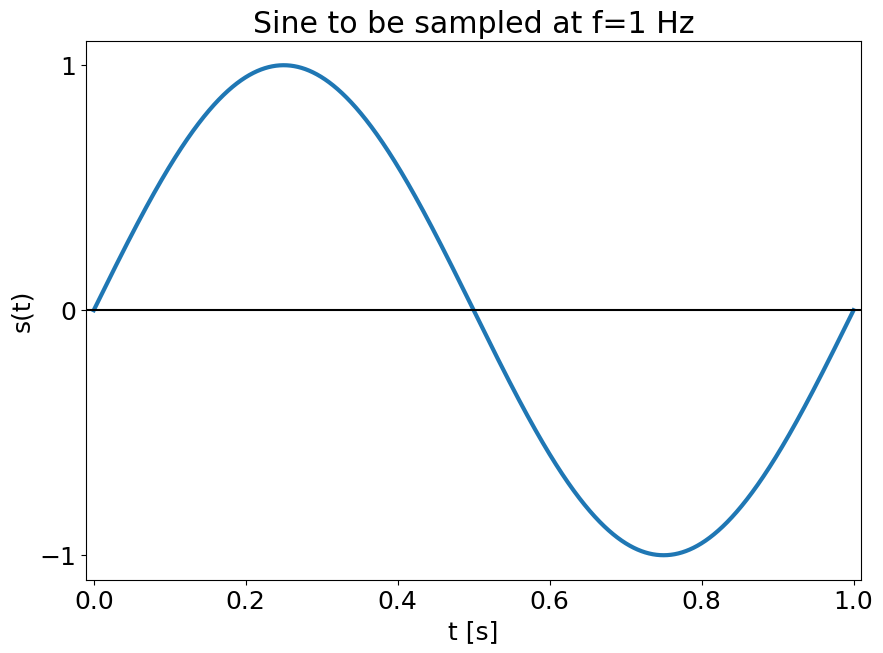

In [7]:
plt.figure(figsize=(10, 7))
plt.title(f"Sine to be sampled at f={f} Hz")
plt.plot(t, s_t, linewidth=3)
plt.hlines(0, xmin=xlim[0], xmax=xlim[1], colors='black')
plt.xlim(xlim)
plt.xlabel('t [s]')
plt.ylabel('s(t)')
plt.yticks(yticks)
plt.show()

In [8]:
sample_rate = 8 #Hz

In [9]:
sampled_time = np.linspace(0, 1, sample_rate)

sampled_time

array([0.        , 0.14285714, 0.28571429, 0.42857143, 0.57142857,
       0.71428571, 0.85714286, 1.        ])

In [10]:
sampled_signal = signal(A, f, sampled_time)

sampled_signal

array([ 0.00000000e+00,  7.81831482e-01,  9.74927912e-01,  4.33883739e-01,
       -4.33883739e-01, -9.74927912e-01, -7.81831482e-01, -2.44929360e-16])

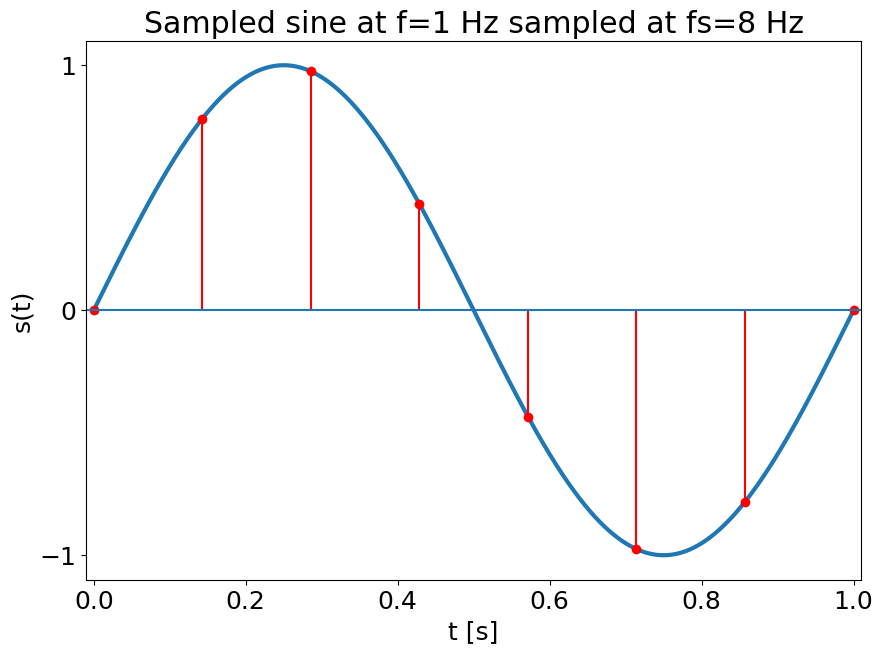

In [11]:
plt.figure(figsize=(10, 7))
plt.title(f"Sampled sine at f={f} Hz sampled at fs={sample_rate} Hz")
plt.plot(t, s_t, linewidth=3)
plt.stem(sampled_time, sampled_signal, linefmt='r-', markerfmt='ro', basefmt=' ')
plt.hlines(0, xmin=xlim[0], xmax=xlim[1])
plt.xlim(xlim)
plt.xlabel('t [s]')
plt.ylabel('s(t)')
plt.yticks(yticks)
plt.show()